In [1]:
import requests

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

import pprint

from skimage import io, color, filters
from skimage.transform import resize, rotate


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import scipy
import os
import matplotlib
from matplotlib import pyplot as plt

from PIL import Image


matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [3]:
# df = pd.DataFrame.from_dict(attrs, orient='index').T

# df

In [4]:
import ebay_scraper

In [5]:
import requests

import csv

import pandas as pd

from bs4 import BeautifulSoup


# def get_page(url):

#     response = requests.get(url)

#     if not response.ok:
#         print('Server responded: ', response.status_code)
#     else:
#         soup = BeautifulSoup(response.text, 'lxml')
#     return soup


# def get_detail_data(soup):

#     # title
#     # price
#     # image
#     # description

#     try:
#         # title = soup.find('h1', id='itemTitle').get('span')
#         title = soup.find('span', class_='g-hdn').next_sibling
#     except:
#         title = ''
    
#     try:
#         p = soup.find('span', id='prcIsum').text.strip()
#         currency, price = p.split(' ')
#     except:
#         price = ''
#         currency = ''
    
#     try:
#         img = soup.find('img', id='icImg').get('src')
#     except:
#         img = ''
    
#     try:
#         # desc = [tr.find_all('td') for tr in soup.find('div', id='viTabs_0_is').find('table').find_all('tr')]
        
#         table = soup.find('div', id='viTabs_0_is').find('table')
#         table_rows = table.find_all('tr')
        
#         d = []

#         for tr in table_rows:
#             td = tr.find_all('td')
#             row = [tr.get_text(strip=True) for tr in td]
#             d.append(row)

#         try:
#             cols = [x[0] for x in d] + [x[2] for x in d]
#         except:
#             cols = [x[0] for x in d]
#         try:
#             vals = [x[1] for x in d] + [x[3] for x in d]
#         except:
#             vals = [x[1] for x in d]
#         attrs = {k: v for k,v in zip(cols, vals)}

#         desc = attrs
#         # desc = pd.DataFrame.from_dict(attrs, orient='index').T
#     except:
#         desc = ''
    
    
#     data = {
#         'title': title,
#         'price': price,
#         'currency': currency,
#         'image': img,
#         'desc': desc
#     }

#     return data


# def get_index_data(soup):

#     try:
#         links = soup.find_all('a', class_='s-item__link')
#     except:
#         links = []
    
#     urls = [item.get('href') for item in links]

#     return urls


# def write_csv(data, url, cat):
    
#     file_name = str(cat) + '.csv'
    
#     with open(file_name, 'a') as csvfile:
#         writer = csv.writer(csvfile)

#         row = [data['title'], data['price'], data['currency'], data['desc'], data['image'], url]

#         writer.writerow(row)




In [6]:
# def main(url, cat):
    
#     page = 1

#     # print(get_detail_data(get_page(url)))
#     while requests.get(url).ok==True:

#         products = get_index_data(get_page(url))

#         for link in products:
#             data = get_detail_data(get_page(link))
#             write_csv(data, link, cat)

#         page += 1

#         url = url + '&_pgn=' + str(page)

In [7]:
pants = pd.read_csv('./data/pants.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [8]:
pants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22157 entries, 0 to 22156
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         22038 non-null  object
 1   price         18286 non-null  object
 2   currency      18286 non-null  object
 3   attributes    12106 non-null  object
 4   image_link    22038 non-null  object
 5   listing_link  22157 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [9]:
# pd.DataFrame.from_dict({i: x[i] 
#                            for x.items() in attr})

In [10]:
pants.iloc[0]

title           Dickies Carpenter Jeans Dungaree Five Pocket H...
price                                                   $19.99/ea
currency                                                       US
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/DAoAAOSwaldesiK...
listing_link    https://www.ebay.com/itm/Dickies-Carpenter-Jea...
Name: 0, dtype: object

In [11]:
pants.image_link[0]

'https://i.ebayimg.com/images/g/DAoAAOSwaldesiKQ/s-l300.jpg'

In [12]:
test = io.imread(pants.image_link[0])

In [13]:
print('Type: {}'.format(type(test)))
print('Shape: {}'.format(test.shape))

Type: <class 'numpy.ndarray'>
Shape: (289, 300, 3)


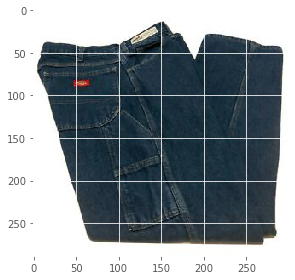

In [14]:
io.imshow(test);

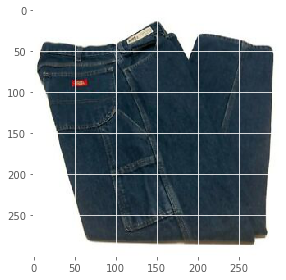

In [15]:
io.imshow(resize(test, (300,300)));

In [16]:
test2 = io.imread(pants.image_link[1])

print('Type: {}'.format(type(test2)))
print('Shape: {}'.format(test2.shape))

Type: <class 'numpy.ndarray'>
Shape: (300, 225, 3)


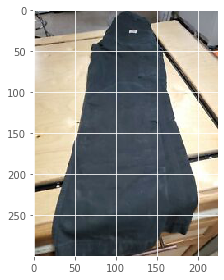

In [17]:
io.imshow(test2)

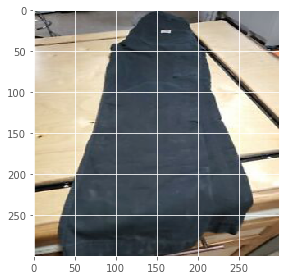

In [18]:
io.imshow(resize(test2, (300,300)));

In [19]:
urls = pd.DataFrame(pants.image_link)

In [20]:
pants = pants.drop(urls[urls.image_link.isnull()].index, axis=0)

In [21]:
urls = pd.DataFrame(pants.image_link)

In [22]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/pants' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [23]:
boots = pd.read_csv('./data/boots.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [24]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38341 non-null  object
 1   price         25289 non-null  object
 2   currency      25289 non-null  object
 3   attributes    26335 non-null  object
 4   image_link    38341 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [25]:
urls = pd.DataFrame(boots.image_link)

In [26]:
boots = boots.drop(urls[urls.image_link.isnull()].index, axis=0)

In [27]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38341 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38341 non-null  object
 1   price         25289 non-null  object
 2   currency      25289 non-null  object
 3   attributes    26335 non-null  object
 4   image_link    38341 non-null  object
 5   listing_link  38341 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [28]:
urls = pd.DataFrame(boots.image_link)

In [29]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/boots' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [30]:
casual_shirts = pd.read_csv('./data/casual_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [31]:
casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27282 non-null  object
 1   price         19801 non-null  object
 2   currency      19801 non-null  object
 3   attributes    15376 non-null  object
 4   image_link    27282 non-null  object
 5   listing_link  27330 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [32]:
urls = pd.DataFrame(casual_shirts.image_link)

In [33]:
casual_shirts = casual_shirts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [34]:
casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27282 entries, 0 to 27329
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27282 non-null  object
 1   price         19801 non-null  object
 2   currency      19801 non-null  object
 3   attributes    15376 non-null  object
 4   image_link    27282 non-null  object
 5   listing_link  27282 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [35]:
urls = pd.DataFrame(casual_shirts.image_link)

In [36]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/casualshirt' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [37]:
casual_shoes = pd.read_csv('./data/casual_shoes.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [38]:
casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39312 entries, 0 to 39311
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38508 non-null  object
 1   price         28767 non-null  object
 2   currency      28767 non-null  object
 3   attributes    27046 non-null  object
 4   image_link    38508 non-null  object
 5   listing_link  39312 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [39]:
urls = pd.DataFrame(casual_shoes.image_link)

In [40]:
casual_shoes = casual_shoes.drop(urls[urls.image_link.isnull()].index, axis=0)

In [41]:
casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38508 entries, 0 to 39311
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38508 non-null  object
 1   price         28767 non-null  object
 2   currency      28767 non-null  object
 3   attributes    27046 non-null  object
 4   image_link    38508 non-null  object
 5   listing_link  38508 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [42]:
urls = pd.DataFrame(casual_shoes.image_link)

In [43]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/casualshoe' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [210]:
coats_jackets = pd.read_csv('./data/coats_jackets.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [211]:
coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39208 non-null  object
 1   price         29871 non-null  object
 2   currency      29871 non-null  object
 3   attributes    31541 non-null  object
 4   image_link    39208 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [212]:
urls = pd.DataFrame(coats_jackets.image_link)

In [213]:
coats_jackets = coats_jackets.drop(urls[urls.image_link.isnull()].index, axis=0)

In [214]:
coats_jackets = coats_jackets.drop([18499], axis=0)

In [215]:
coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39207 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39207 non-null  object
 1   price         29870 non-null  object
 2   currency      29870 non-null  object
 3   attributes    31540 non-null  object
 4   image_link    39207 non-null  object
 5   listing_link  39207 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [216]:
coats_jackets.iloc[18495]

title            Dunning Golf Men’s Gray Full Zip Jacket Sz Large
price                                                      $48.88
currency                                                       US
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/bxIAAOSwgAZfWq9...
listing_link    https://www.ebay.com/itm/Dunning-Golf-Men-s-Gr...
Name: 18500, dtype: object

In [217]:
urls = pd.DataFrame(coats_jackets.image_link)

In [219]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/coatjacket/coatjacket' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [53]:
dress_shirts = pd.read_csv('./data/dress_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [54]:
dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         21790 non-null  object
 2   currency      21790 non-null  object
 3   attributes    27957 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [55]:
urls = pd.DataFrame(dress_shirts.image_link)

In [56]:
dress_shirts = dress_shirts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [57]:
dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         21790 non-null  object
 2   currency      21790 non-null  object
 3   attributes    27957 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [58]:
urls = pd.DataFrame(dress_shirts.image_link)

In [59]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/dressshirt/dressshirt' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [60]:
dress_shoes = pd.read_csv('./data/dress_shoes.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [61]:
dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39264 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38638 non-null  object
 1   price         25771 non-null  object
 2   currency      25771 non-null  object
 3   attributes    23602 non-null  object
 4   image_link    38638 non-null  object
 5   listing_link  39264 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [62]:
urls = pd.DataFrame(dress_shoes.image_link)

In [63]:
dress_shoes = dress_shoes.drop(urls[urls.image_link.isnull()].index, axis=0)

In [64]:
dress_shoes= dress_shoes.drop(dress_shoes[dress_shoes.image_link.str.contains("shoeffl")].index, axis=0)

In [65]:
dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38599 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38599 non-null  object
 1   price         25732 non-null  object
 2   currency      25732 non-null  object
 3   attributes    23602 non-null  object
 4   image_link    38599 non-null  object
 5   listing_link  38599 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [66]:
urls = pd.DataFrame(dress_shoes.image_link)

In [67]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/dressshoe/dressshoe' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [68]:
jeans = pd.read_csv('./data/jeans.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [69]:
jeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29083 entries, 0 to 29082
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         28808 non-null  object
 1   price         20828 non-null  object
 2   currency      20828 non-null  object
 3   attributes    19251 non-null  object
 4   image_link    28808 non-null  object
 5   listing_link  29083 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [70]:
urls = pd.DataFrame(jeans.image_link)

In [71]:
jeans = jeans.drop(urls[urls.image_link.isnull()].index, axis=0)

In [72]:
jeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28808 entries, 0 to 29082
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         28808 non-null  object
 1   price         20828 non-null  object
 2   currency      20828 non-null  object
 3   attributes    19251 non-null  object
 4   image_link    28808 non-null  object
 5   listing_link  28808 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [73]:
urls = pd.DataFrame(jeans.image_link)

In [74]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/jeans/jeans' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [75]:
polos = pd.read_csv('./data/polo_shirt.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [76]:
polos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         34299 non-null  object
 1   price         21302 non-null  object
 2   currency      21302 non-null  object
 3   attributes    22274 non-null  object
 4   image_link    34299 non-null  object
 5   listing_link  34299 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [77]:
urls = pd.DataFrame(polos.image_link)

In [78]:
polos = polos.drop(urls[urls.image_link.isnull()].index, axis=0)

In [79]:
polos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 0 to 34298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         34299 non-null  object
 1   price         21302 non-null  object
 2   currency      21302 non-null  object
 3   attributes    22274 non-null  object
 4   image_link    34299 non-null  object
 5   listing_link  34299 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [80]:
urls = pd.DataFrame(polos.image_link)

In [81]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/polos/polo' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [82]:
shorts = pd.read_csv('./data/shorts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [83]:
shorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         26901 non-null  object
 1   price         15266 non-null  object
 2   currency      15266 non-null  object
 3   attributes    21243 non-null  object
 4   image_link    26901 non-null  object
 5   listing_link  27070 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [84]:
urls = pd.DataFrame(shorts.image_link)

In [85]:
shorts = shorts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [86]:
shorts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26901 entries, 0 to 27069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         26901 non-null  object
 1   price         15266 non-null  object
 2   currency      15266 non-null  object
 3   attributes    21243 non-null  object
 4   image_link    26901 non-null  object
 5   listing_link  26901 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [87]:
urls = pd.DataFrame(shorts.image_link)

In [88]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/shorts/shorts' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [89]:
sneakers = pd.read_csv('./data/sneakers.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [90]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39264 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         32132 non-null  object
 1   price         27237 non-null  object
 2   currency      27237 non-null  object
 3   attributes    27039 non-null  object
 4   image_link    32132 non-null  object
 5   listing_link  39264 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [91]:
urls = pd.DataFrame(sneakers.image_link)

In [92]:
sneakers = sneakers.drop(urls[urls.image_link.isnull()].index, axis=0)

In [93]:
sneakers[sneakers.image_link.str.contains("shoeffl")]

Empty DataFrame
Columns: [title, price, currency, attributes, image_link, listing_link]
Index: []

In [94]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32132 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         32132 non-null  object
 1   price         27237 non-null  object
 2   currency      27237 non-null  object
 3   attributes    27039 non-null  object
 4   image_link    32132 non-null  object
 5   listing_link  32132 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


In [95]:
urls = pd.DataFrame(sneakers.image_link)

In [96]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/sneakers/sneakers' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [97]:
suits = pd.read_csv('./data/suits_blazers.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [98]:
suits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38910 non-null  object
 1   price         15365 non-null  object
 2   currency      15365 non-null  object
 3   attributes    16168 non-null  object
 4   image_link    38910 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [99]:
urls = pd.DataFrame(suits.image_link)

In [100]:
suits = suits.drop(urls[urls.image_link.isnull()].index, axis=0)

In [101]:
suits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38910 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38910 non-null  object
 1   price         15365 non-null  object
 2   currency      15365 non-null  object
 3   attributes    16168 non-null  object
 4   image_link    38910 non-null  object
 5   listing_link  38910 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [102]:
urls = pd.DataFrame(suits.image_link)

In [103]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/suits/suit' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [104]:
sweaters = pd.read_csv('./data/sweaters.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [105]:
sweaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         26141 non-null  object
 2   currency      26141 non-null  object
 3   attributes    28071 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [106]:
urls = pd.DataFrame(sweaters.image_link)

In [107]:
suits = suits.drop(urls[urls.image_link.isnull()].index, axis=0)

In [108]:
sweaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         26141 non-null  object
 2   currency      26141 non-null  object
 3   attributes    28071 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [109]:
urls = pd.DataFrame(sweaters.image_link)

In [110]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/sweaters/sweater' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [111]:
tees = pd.read_csv('./data/t_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [112]:
tees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27033 entries, 0 to 27032
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27033 non-null  object
 1   price         19681 non-null  object
 2   currency      19681 non-null  object
 3   attributes    19873 non-null  object
 4   image_link    27033 non-null  object
 5   listing_link  27033 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [113]:
urls = pd.DataFrame(tees.image_link)

In [114]:
tees = tees.drop(urls[urls.image_link.isnull()].index, axis=0)

In [115]:
tees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27033 entries, 0 to 27032
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27033 non-null  object
 1   price         19681 non-null  object
 2   currency      19681 non-null  object
 3   attributes    19873 non-null  object
 4   image_link    27033 non-null  object
 5   listing_link  27033 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [116]:
# urls = pd.DataFrame(tees.image_link)

In [117]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/tshirts/tshirt' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [118]:
tees['i'] = tees.index

In [119]:
tees.head()

title   price currency  \
0             Lot of 8 Nike T-Shirts - Men's Size XL  $52.88       US   
1   Quicksilver Men's Graphic T-shirt L Surfer Shirt   $5.00       US   
2  Lot of 2 Rick and Morty Ripple Junction T-Shir...   $6.99       US   
3  Jamaica Irie Tank Top Size Medium Lindsays Ori...   $9.25       US   
4  Lot of 4 Polo by Ralph Lauren Mens Small Short...     NaN      NaN   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/ObkAAOSwyxhfSNz...   
1  https://i.ebayimg.com/images/g/81oAAOSw22Ff45L...   
2  https://i.ebayimg.com/images/g/eJAAAOSwqlZf43Y...   
3  https://i.ebayimg.com/images/g/qfMAAOSwUmhf423...   
4  https://i.ebayimg.com/images/g/DqUAAOSwi9Vf4zB...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Lot-of-8-Nike-T-Shirt...  0  
1  https://www.ebay.com/itm/Quicksilver-Mens-Grap...  1  
2  https://www.ebay.com/itm/Lot-of-2-Rick-and-Mor...  2  
3  https://www.ebay.com/itm/Jamaica-Irie-Tank-Top...  3  
4  https://www.ebay.com/itm/Lot-of-4-Polo-by-Ralp...  4

In [120]:
tees['i'] = './imgs/tshirts/shirt' + str(tees.index) + '.jpg'

In [121]:
for i in tees.index:
    tees['i'][i] = './imgs/tshirts/shirt' + str(i) + '.jpg'

In [122]:
tees.iloc[27]

title           Uniqlo Metal Gear Solid Mens T Shirt XL Vtg 20...
price                                                      $49.00
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/9iMAAOSwB4Zf43R...
listing_link    https://www.ebay.com/itm/Uniqlo-Metal-Gear-Sol...
i                                      ./imgs/tshirts/shirt27.jpg
Name: 27, dtype: object

In [123]:
tees['price'] = tees['price'].replace('[\$,]', '', regex=True).astype(float)

In [124]:
tees.describe()

price
count  19681.000000
mean      29.323417
std       94.088025
min        1.990000
25%        9.990000
50%       14.990000
75%       20.000000
max     2500.000000

In [125]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38341 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38341 non-null  object
 1   price         25289 non-null  object
 2   currency      25289 non-null  object
 3   attributes    26335 non-null  object
 4   image_link    38341 non-null  object
 5   listing_link  38341 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [126]:
boots['i'] = boots.index

boots.head()

title    price currency  \
0  Oakley Combat Boots Vibram Sole Size 9.5 Tacti...   $40.00       US   
1  Crockett & Jones England  Brown Boots Shoes ME...  $129.00       US   
2    Tecovas - The Duke Mens Cowboy Boots Size 10.5D  $169.00       US   
3  ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...   $50.00       US   
4       Red Wing 866 Pecos Pull On Work Boots 9 2nds   $69.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3                                                NaN   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...   
1  https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...   
2  https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...   
3  https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...   
4  https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Oakley-Combat-Boots-V...  0  
1  https://www.ebay.com/itm/Crockett-Jones-Englan...  1  
2  https://www.ebay.com/itm/Tecovas-The-Duke-Mens...  2  
3  https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...  3  
4  https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...  4

In [127]:
for i in boots.index:
    boots['i'][i] = './imgs/boots/boots' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [128]:
boots.head()

title    price currency  \
0  Oakley Combat Boots Vibram Sole Size 9.5 Tacti...   $40.00       US   
1  Crockett & Jones England  Brown Boots Shoes ME...  $129.00       US   
2    Tecovas - The Duke Mens Cowboy Boots Size 10.5D  $169.00       US   
3  ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...   $50.00       US   
4       Red Wing 866 Pecos Pull On Work Boots 9 2nds   $69.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3                                                NaN   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...   
1  https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...   
2  https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...   
3  https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...   
4  https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...   

                                        listing_link                        i  
0  https://www.ebay.com/itm/Oakley-Combat-Boots-V...  ./imgs/boots/boots0.jpg  
1  https://www.ebay.com/itm/Crockett-Jones-Englan...  ./imgs/boots/boots1.jpg  
2  https://www.ebay.com/itm/Tecovas-The-Duke-Mens...  ./imgs/boots/boots2.jpg  
3  https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...  ./imgs/boots/boots3.jpg  
4  https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...  ./imgs/boots/boots4.jpg

In [129]:
boots['price'] = boots['price'].replace('[^.0-9]', '', regex=True).astype(float)

In [130]:
boots.describe()

price
count  25289.000000
mean     101.230545
std       73.554472
min       17.850000
25%       55.950000
50%       77.990000
75%      120.000000
max      447.000000

In [131]:
casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27282 entries, 0 to 27329
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27282 non-null  object
 1   price         19801 non-null  object
 2   currency      19801 non-null  object
 3   attributes    15376 non-null  object
 4   image_link    27282 non-null  object
 5   listing_link  27282 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [132]:
casual_shirts['i'] = casual_shirts.index

casual_shirts.head()

title   price currency  \
0  VTG The Alaskan Mens  2XL Tall Grn / White Pla...  $30.00       US   
1  Vineyard Vines Performance Striped Blue Mens P...  $16.00       US   
2  Nike Golf Dri Fit Polo Shirt Short Sleeve Red ...  $24.96       US   
3                          Champs Men's Casual Shirt  $12.99       US   
4                 Brooks Brothers Men's Casual Shirt  $12.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3                                                NaN   
4                                                NaN   

                                          image_link  \
0  https://i.ebayimg.com/images/g/bUkAAOSw2Plf4zh...   
1  https://i.ebayimg.com/images/g/EskAAOSwLttf4tN...   
2  https://i.ebayimg.com/images/g/RTwAAOSwETVf4tT...   
3  https://i.ebayimg.com/images/g/IksAAOSwTcdf40w...   
4  https://i.ebayimg.com/images/g/NL0AAOSwW-9f40s...   

                                        listing_link  i  
0  https://www.ebay.com/itm/VTG-The-Alaskan-Mens-...  0  
1  https://www.ebay.com/itm/Vineyard-Vines-Perfor...  1  
2  https://www.ebay.com/itm/Nike-Golf-Dri-Fit-Pol...  2  
3  https://www.ebay.com/itm/Champs-Mens-Casual-Sh...  3  
4  https://www.ebay.com/itm/Brooks-Brothers-Mens-...  4

In [133]:
for i in casual_shirts.index:
    casual_shirts['i'][i] = './imgs/casualshirt/casualshirt' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [134]:
casual_shirts.head()

title   price currency  \
0  VTG The Alaskan Mens  2XL Tall Grn / White Pla...  $30.00       US   
1  Vineyard Vines Performance Striped Blue Mens P...  $16.00       US   
2  Nike Golf Dri Fit Polo Shirt Short Sleeve Red ...  $24.96       US   
3                          Champs Men's Casual Shirt  $12.99       US   
4                 Brooks Brothers Men's Casual Shirt  $12.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3                                                NaN   
4                                                NaN   

                                          image_link  \
0  https://i.ebayimg.com/images/g/bUkAAOSw2Plf4zh...   
1  https://i.ebayimg.com/images/g/EskAAOSwLttf4tN...   
2  https://i.ebayimg.com/images/g/RTwAAOSwETVf4tT...   
3  https://i.ebayimg.com/images/g/IksAAOSwTcdf40w...   
4  https://i.ebayimg.com/images/g/NL0AAOSwW-9f40s...   

                                        listing_link  \
0  https://www.ebay.com/itm/VTG-The-Alaskan-Mens-...   
1  https://www.ebay.com/itm/Vineyard-Vines-Perfor...   
2  https://www.ebay.com/itm/Nike-Golf-Dri-Fit-Pol...   
3  https://www.ebay.com/itm/Champs-Mens-Casual-Sh...   
4  https://www.ebay.com/itm/Brooks-Brothers-Mens-...   

                                     i  
0  ./imgs/casualshirt/casualshirt0.jpg  
1  ./imgs/casualshirt/casualshirt1.jpg  
2  ./imgs/casualshirt/casualshirt2.jpg  
3  ./imgs/casualshirt/casualshirt3.jpg  
4  ./imgs/casualshirt/casualshirt4.jpg

In [135]:
casual_shirts.iloc[19504]

title           PIERRINI  MILANO 100% LINEN MEN SHIRT SIZE 3XL...
price                                                         NaN
currency                                                      NaN
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/LJgAAOSwG5teCPw...
listing_link    https://www.ebay.com/itm/PIERRINI-MILANO-100-L...
i                         ./imgs/casualshirt/casualshirt19511.jpg
Name: 19511, dtype: object

In [136]:
casual_shirts['price'] = casual_shirts['price'].replace('[^.0-9]', '', regex=True).astype(float)

casual_shirts.describe()

price
count  19801.000000
mean      40.399908
std       43.631460
min        6.000000
25%       24.890000
50%       29.990000
75%       39.990000
max      700.000000

In [137]:
casual_shoes['i'] = casual_shoes.index

casual_shoes.head()

title      price currency  \
0              Steve Madden Men’s Casual Shoes Sz 11     $30.00       US   
1  Timberland Mens Waterproof Shoes Size 11 Genui...     $39.99       US   
2  Shoes for Crews Bloodstone Black, Style# 62101...  $29.99/ea       US   
3  Mens Authentic Louis Vuitton Run Away Monogram...    $650.00       US   
4  Olukai Mens Light Brown Fabric Walking Casual ...     $39.50       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4                                                NaN   

                                          image_link  \
0  https://i.ebayimg.com/images/g/UB0AAOSwsFdf4~u...   
1  https://i.ebayimg.com/images/g/BRYAAOSwyHhf5As...   
2  https://i.ebayimg.com/images/g/avMAAOSwsKxfqge...   
3  https://i.ebayimg.com/images/g/kHgAAOSwxzxfu~G...   
4  https://i.ebayimg.com/images/g/30QAAOSwXkRf4~j...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Steve-Madden-Men-s-Ca...  0  
1  https://www.ebay.com/itm/Timberland-Mens-Water...  1  
2  https://www.ebay.com/itm/Shoes-for-Crews-Blood...  2  
3  https://www.ebay.com/itm/Mens-Authentic-Louis-...  3  
4  https://www.ebay.com/itm/Olukai-Mens-Light-Bro...  4

In [138]:
for i in casual_shoes.index:
    casual_shoes['i'][i] = './imgs/casualshoe/casualshoe' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [139]:
casual_shoes.head()

title      price currency  \
0              Steve Madden Men’s Casual Shoes Sz 11     $30.00       US   
1  Timberland Mens Waterproof Shoes Size 11 Genui...     $39.99       US   
2  Shoes for Crews Bloodstone Black, Style# 62101...  $29.99/ea       US   
3  Mens Authentic Louis Vuitton Run Away Monogram...    $650.00       US   
4  Olukai Mens Light Brown Fabric Walking Casual ...     $39.50       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4                                                NaN   

                                          image_link  \
0  https://i.ebayimg.com/images/g/UB0AAOSwsFdf4~u...   
1  https://i.ebayimg.com/images/g/BRYAAOSwyHhf5As...   
2  https://i.ebayimg.com/images/g/avMAAOSwsKxfqge...   
3  https://i.ebayimg.com/images/g/kHgAAOSwxzxfu~G...   
4  https://i.ebayimg.com/images/g/30QAAOSwXkRf4~j...   

                                        listing_link  \
0  https://www.ebay.com/itm/Steve-Madden-Men-s-Ca...   
1  https://www.ebay.com/itm/Timberland-Mens-Water...   
2  https://www.ebay.com/itm/Shoes-for-Crews-Blood...   
3  https://www.ebay.com/itm/Mens-Authentic-Louis-...   
4  https://www.ebay.com/itm/Olukai-Mens-Light-Bro...   

                                   i  
0  ./imgs/casualshoe/casualshoe0.jpg  
1  ./imgs/casualshoe/casualshoe1.jpg  
2  ./imgs/casualshoe/casualshoe2.jpg  
3  ./imgs/casualshoe/casualshoe3.jpg  
4  ./imgs/casualshoe/casualshoe4.jpg

In [140]:
casual_shoes.iloc[29294]

title           GUCCI Dark Green GENUINE SUEDE, Silver Metal L...
price                                                         NaN
currency                                                      NaN
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/KJgAAOSwxSNf5A7...
listing_link    https://www.ebay.com/itm/GUCCI-Dark-Green-GENU...
i                           ./imgs/casualshoe/casualshoe30042.jpg
Name: 30042, dtype: object

In [141]:
casual_shoes['price'] = casual_shoes['price'].replace('[^.0-9]', '', regex=True).astype(float)

casual_shoes.describe()

price
count  28767.000000
mean     114.504896
std      174.275984
min        9.900000
25%       30.000000
50%       46.000000
75%       98.000000
max      900.000000

In [220]:
coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39207 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39207 non-null  object
 1   price         29870 non-null  object
 2   currency      29870 non-null  object
 3   attributes    31540 non-null  object
 4   image_link    39207 non-null  object
 5   listing_link  39207 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [221]:
coats_jackets['i'] = coats_jackets.index

coats_jackets.head()

title    price currency  \
0  Moose Knuckles Shearling Collar Jacket Coat Si...  $250.00       US   
1  Marmot Men XL Full Zip Ski Shell Jacket Blue W...   $39.99       US   
2     Patagonia Piton Fleece Jacket Men's XL Orange    $60.00       US   
3   Carhartt Sherpa Lined Red Flannel Shirt Jacket M   $50.00       US   
4  Patagonia Polartec Fleece Base Pullover Men's ...   $39.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/EYgAAOSwT~lf48B...   
1  https://i.ebayimg.com/images/g/I5gAAOSwFdNf4ni...   
2  https://i.ebayimg.com/images/g/lPcAAOSwc-df49J...   
3  https://i.ebayimg.com/images/g/~ggAAOSwq1Ff474...   
4  https://i.ebayimg.com/images/g/qMcAAOSwDXlf47U...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Moose-Knuckles-Shearl...  0  
1  https://www.ebay.com/itm/Marmot-Men-XL-Full-Zi...  1  
2  https://www.ebay.com/itm/Patagonia-Piton-Fleec...  2  
3  https://www.ebay.com/itm/Carhartt-Sherpa-Lined...  3  
4  https://www.ebay.com/itm/Patagonia-Polartec-Fl...  4

In [222]:
for i in coats_jackets.index:
    coats_jackets['i'][i] = './imgs/coatjacket/coatjacket' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [223]:
coats_jackets.head()

title    price currency  \
0  Moose Knuckles Shearling Collar Jacket Coat Si...  $250.00       US   
1  Marmot Men XL Full Zip Ski Shell Jacket Blue W...   $39.99       US   
2     Patagonia Piton Fleece Jacket Men's XL Orange    $60.00       US   
3   Carhartt Sherpa Lined Red Flannel Shirt Jacket M   $50.00       US   
4  Patagonia Polartec Fleece Base Pullover Men's ...   $39.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/EYgAAOSwT~lf48B...   
1  https://i.ebayimg.com/images/g/I5gAAOSwFdNf4ni...   
2  https://i.ebayimg.com/images/g/lPcAAOSwc-df49J...   
3  https://i.ebayimg.com/images/g/~ggAAOSwq1Ff474...   
4  https://i.ebayimg.com/images/g/qMcAAOSwDXlf47U...   

                                        listing_link  \
0  https://www.ebay.com/itm/Moose-Knuckles-Shearl...   
1  https://www.ebay.com/itm/Marmot-Men-XL-Full-Zi...   
2  https://www.ebay.com/itm/Patagonia-Piton-Fleec...   
3  https://www.ebay.com/itm/Carhartt-Sherpa-Lined...   
4  https://www.ebay.com/itm/Patagonia-Polartec-Fl...   

                                   i  
0  ./imgs/coatjacket/coatjacket0.jpg  
1  ./imgs/coatjacket/coatjacket1.jpg  
2  ./imgs/coatjacket/coatjacket2.jpg  
3  ./imgs/coatjacket/coatjacket3.jpg  
4  ./imgs/coatjacket/coatjacket4.jpg

In [224]:
coats_jackets.iloc[18495]

title            Dunning Golf Men’s Gray Full Zip Jacket Sz Large
price                                                      $48.88
currency                                                       US
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/bxIAAOSwgAZfWq9...
listing_link    https://www.ebay.com/itm/Dunning-Golf-Men-s-Gr...
i                           ./imgs/coatjacket/coatjacket18500.jpg
Name: 18500, dtype: object

In [225]:
coats_jackets['price'] = coats_jackets['price'].replace('[^.0-9]', '', regex=True).astype(float)

coats_jackets.describe()

price
count  29870.000000
mean     114.110057
std      113.853922
min        7.000000
25%       49.990000
50%       70.000000
75%      150.000000
max     1000.000000

In [148]:
dress_shirts['i'] = dress_shirts.index

dress_shirts.head()

title   price currency  \
0                                  Mens Dress Shirt      NaN      NaN   
1                           Calvin Klein Dress Shirt     NaN      NaN   
2  Polo Ralph Lauren dress shirt XXL oxford butto...  $27.99       US   
3  UNTUCKit mens Purple Long sleeve dress shirt S...  $29.99       US   
4         Jos A Bank Traveler White Shirt Size 15 34  $25.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/2kkAAOSwgEJfvf7...   
1  https://i.ebayimg.com/images/g/3hsAAOSwhrRfvf-...   
2  https://i.ebayimg.com/images/g/rEYAAOSwBGJf4t8...   
3  https://i.ebayimg.com/images/g/GnIAAOSwPzVfk5C...   
4  https://i.ebayimg.com/images/g/1NsAAOSwDxdf4t3...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Mens-Dress-Shirt/2338...  0  
1  https://www.ebay.com/itm/Calvin-Klein-Dress-Sh...  1  
2  https://www.ebay.com/itm/Polo-Ralph-Lauren-dre...  2  
3  https://www.ebay.com/itm/UNTUCKit-mens-Purple-...  3  
4  https://www.ebay.com/itm/Jos-A-Bank-Traveler-W...  4

In [149]:
for i in dress_shirts.index:
    dress_shirts['i'][i] = './imgs/dressshirt/dressshirt' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [150]:
dress_shirts.head()

title   price currency  \
0                                  Mens Dress Shirt      NaN      NaN   
1                           Calvin Klein Dress Shirt     NaN      NaN   
2  Polo Ralph Lauren dress shirt XXL oxford butto...  $27.99       US   
3  UNTUCKit mens Purple Long sleeve dress shirt S...  $29.99       US   
4         Jos A Bank Traveler White Shirt Size 15 34  $25.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/2kkAAOSwgEJfvf7...   
1  https://i.ebayimg.com/images/g/3hsAAOSwhrRfvf-...   
2  https://i.ebayimg.com/images/g/rEYAAOSwBGJf4t8...   
3  https://i.ebayimg.com/images/g/GnIAAOSwPzVfk5C...   
4  https://i.ebayimg.com/images/g/1NsAAOSwDxdf4t3...   

                                        listing_link  \
0  https://www.ebay.com/itm/Mens-Dress-Shirt/2338...   
1  https://www.ebay.com/itm/Calvin-Klein-Dress-Sh...   
2  https://www.ebay.com/itm/Polo-Ralph-Lauren-dre...   
3  https://www.ebay.com/itm/UNTUCKit-mens-Purple-...   
4  https://www.ebay.com/itm/Jos-A-Bank-Traveler-W...   

                                   i  
0  ./imgs/dressshirt/dressshirt0.jpg  
1  ./imgs/dressshirt/dressshirt1.jpg  
2  ./imgs/dressshirt/dressshirt2.jpg  
3  ./imgs/dressshirt/dressshirt3.jpg  
4  ./imgs/dressshirt/dressshirt4.jpg

In [151]:
dress_shirts.iloc[37434]

title            Batistini Navy Tonal Stripe Dress Shirt 41/42 15
price                                                         NaN
currency                                                      NaN
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/27QAAOSw-gJfxg0...
listing_link    https://www.ebay.com/itm/Batistini-Navy-Tonal-...
i                           ./imgs/dressshirt/dressshirt37434.jpg
Name: 37434, dtype: object

In [152]:
dress_shirts['price'] = dress_shirts['price'].replace('[^.0-9]', '', regex=True).astype(float)

dress_shirts.describe()

price
count  21790.000000
mean      36.577712
std       15.876785
min        5.990000
25%       25.000000
50%       33.000000
75%       44.980000
max      148.000000

In [153]:
dress_shoes['i'] = dress_shoes.index

dress_shoes.head()

title   price currency  \
0                     Rockport oxford mens shoes 9.5  $39.00       US   
1  Dr Doc Martens Black White Oxford Wingtip Brog...  $49.99       US   
2           Johnson Murphy Men Dress Shoes Sz 10.5-D  $50.00       US   
3  VTG Florsheim Imperial Wing Tip Black Oxford D...  $24.99       US   
4  Allen Edmonds Mens Shoe Bridgeton Model Tassel...  $36.97       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/iA8AAOSwkYpf5I-...   
1  https://i.ebayimg.com/images/g/ReUAAOSwxB5ftKj...   
2  https://i.ebayimg.com/images/g/qF8AAOSwmCxf5KM...   
3  https://i.ebayimg.com/images/g/eQAAAOSwevBf5K2...   
4  https://i.ebayimg.com/images/g/8KUAAOSwdHlf5Ku...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Rockport-oxford-mens-...  0  
1  https://www.ebay.com/itm/Dr-Doc-Martens-Black-...  1  
2  https://www.ebay.com/itm/Johnson-Murphy-Men-Dr...  2  
3  https://www.ebay.com/itm/VTG-Florsheim-Imperia...  3  
4  https://www.ebay.com/itm/Allen-Edmonds-Mens-Sh...  4

In [154]:
for i in dress_shoes.index:
    dress_shoes['i'][i] = './imgs/dressshoe/dressshoe' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [155]:
dress_shoes.head()

title   price currency  \
0                     Rockport oxford mens shoes 9.5  $39.00       US   
1  Dr Doc Martens Black White Oxford Wingtip Brog...  $49.99       US   
2           Johnson Murphy Men Dress Shoes Sz 10.5-D  $50.00       US   
3  VTG Florsheim Imperial Wing Tip Black Oxford D...  $24.99       US   
4  Allen Edmonds Mens Shoe Bridgeton Model Tassel...  $36.97       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/iA8AAOSwkYpf5I-...   
1  https://i.ebayimg.com/images/g/ReUAAOSwxB5ftKj...   
2  https://i.ebayimg.com/images/g/qF8AAOSwmCxf5KM...   
3  https://i.ebayimg.com/images/g/eQAAAOSwevBf5K2...   
4  https://i.ebayimg.com/images/g/8KUAAOSwdHlf5Ku...   

                                        listing_link  \
0  https://www.ebay.com/itm/Rockport-oxford-mens-...   
1  https://www.ebay.com/itm/Dr-Doc-Martens-Black-...   
2  https://www.ebay.com/itm/Johnson-Murphy-Men-Dr...   
3  https://www.ebay.com/itm/VTG-Florsheim-Imperia...   
4  https://www.ebay.com/itm/Allen-Edmonds-Mens-Sh...   

                                 i  
0  ./imgs/dressshoe/dressshoe0.jpg  
1  ./imgs/dressshoe/dressshoe1.jpg  
2  ./imgs/dressshoe/dressshoe2.jpg  
3  ./imgs/dressshoe/dressshoe3.jpg  
4  ./imgs/dressshoe/dressshoe4.jpg

In [156]:
dress_shoes.iloc[35495]

title           Mens Cole Haan boat deck shoes 12M white leath...
price                                                      $66.99
currency                                                       US
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/BOEAAOSwc1JeZAX...
listing_link    https://www.ebay.com/itm/Mens-Cole-Haan-boat-d...
i                             ./imgs/dressshoe/dressshoe36083.jpg
Name: 36083, dtype: object

In [157]:
dress_shoes['price'] = dress_shoes['price'].replace('[^.0-9]', '', regex=True).astype(float)

dress_shoes.describe()

price
count  25732.000000
mean      82.300017
std       81.964743
min        8.990000
25%       36.980000
50%       49.990000
75%       89.990000
max      499.000000

In [158]:
jeans['i'] = jeans.index

jeans.head()

title   price currency  \
0                             rogue territory Chino   $89.00       US   
1  "GRADE A"  CARHARTT  AUTHENTIC COTTON DENIM WO...   $8.00       US   
2               Pelle Pelle Mens Jeans Black 36 X 34  $29.97       US   
3  Carhartt  Dungaree Fit  Brown Jeans 34 x 30 In...  $15.00       US   
4  Hollister Classic Straight Mens Medium Wash Je...  $15.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/RZoAAOSwGgdf4kd...   
1  https://i.ebayimg.com/images/g/kHIAAOSwleBf0tv...   
2  https://i.ebayimg.com/images/g/xBoAAOSwhTRf4nU...   
3  https://i.ebayimg.com/images/g/Ce8AAOSww6lf4nE...   
4  https://i.ebayimg.com/images/g/CCkAAOSwpsJfuX8...   

                                        listing_link  i  
0  https://www.ebay.com/itm/rogue-territory-Chino...  0  
1  https://www.ebay.com/itm/GRADE-A-CARHARTT-AUTH...  1  
2  https://www.ebay.com/itm/Pelle-Pelle-Mens-Jean...  2  
3  https://www.ebay.com/itm/Carhartt-Dungaree-Fit...  3  
4  https://www.ebay.com/itm/Hollister-Classic-Str...  4

In [159]:
for i in jeans.index:
    jeans['i'][i] = './imgs/jeans/jeans' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [160]:
jeans.head()

title   price currency  \
0                             rogue territory Chino   $89.00       US   
1  "GRADE A"  CARHARTT  AUTHENTIC COTTON DENIM WO...   $8.00       US   
2               Pelle Pelle Mens Jeans Black 36 X 34  $29.97       US   
3  Carhartt  Dungaree Fit  Brown Jeans 34 x 30 In...  $15.00       US   
4  Hollister Classic Straight Mens Medium Wash Je...  $15.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/RZoAAOSwGgdf4kd...   
1  https://i.ebayimg.com/images/g/kHIAAOSwleBf0tv...   
2  https://i.ebayimg.com/images/g/xBoAAOSwhTRf4nU...   
3  https://i.ebayimg.com/images/g/Ce8AAOSww6lf4nE...   
4  https://i.ebayimg.com/images/g/CCkAAOSwpsJfuX8...   

                                        listing_link                        i  
0  https://www.ebay.com/itm/rogue-territory-Chino...  ./imgs/jeans/jeans0.jpg  
1  https://www.ebay.com/itm/GRADE-A-CARHARTT-AUTH...  ./imgs/jeans/jeans1.jpg  
2  https://www.ebay.com/itm/Pelle-Pelle-Mens-Jean...  ./imgs/jeans/jeans2.jpg  
3  https://www.ebay.com/itm/Carhartt-Dungaree-Fit...  ./imgs/jeans/jeans3.jpg  
4  https://www.ebay.com/itm/Hollister-Classic-Str...  ./imgs/jeans/jeans4.jpg

In [161]:
jeans.iloc[24391]

title           Vintage Mens Dickies Denim Overalls 34x30 Made...
price                                                      $34.99
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/9GoAAOSwbs5f4q2...
listing_link    https://www.ebay.com/itm/Vintage-Mens-Dickies-...
i                                     ./imgs/jeans/jeans24629.jpg
Name: 24629, dtype: object

In [162]:
jeans['price'] = jeans['price'].replace('[^.0-9]', '', regex=True).astype(float)

jeans.describe()

price
count  20828.000000
mean      41.806169
std       46.988513
min        5.000000
25%       23.990000
50%       32.000000
75%       49.990000
max      950.000000

In [163]:
pants['i'] = pants.index

pants.head()

title      price currency  \
0  Dickies Carpenter Jeans Dungaree Five Pocket H...  $19.99/ea       US   
1                          Carhartt work pants 32x30     $25.00       US   
2  Cargo Work Pants Uniform Used Cintas Unifirst ...      $8.89       US   
3             IBEX New Wool Order Men’s Pant Size 32     $75.00       US   
4  CARHARTT DOUBLE KNEE PANTS 36X28 CARPENTER WOR...     $27.99       US   

                                          attributes  \
0                                                NaN   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/DAoAAOSwaldesiK...   
1  https://i.ebayimg.com/images/g/ME0AAOSwh1tf2Uw...   
2  https://i.ebayimg.com/images/g/Q7gAAOSwWUVc3DR...   
3  https://i.ebayimg.com/images/g/g1QAAOSw97dfyy9...   
4  https://i.ebayimg.com/images/g/e~cAAOSwHflf2Sm...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Dickies-Carpenter-Jea...  0  
1  https://www.ebay.com/itm/Carhartt-work-pants-3...  1  
2  https://www.ebay.com/itm/Cargo-Work-Pants-Unif...  2  
3  https://www.ebay.com/itm/IBEX-New-Wool-Order-M...  3  
4  https://www.ebay.com/itm/CARHARTT-DOUBLE-KNEE-...  4

In [164]:
for i in pants.index:
    pants['i'][i] = './imgs/pants/pants' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [165]:
pants.head()

title      price currency  \
0  Dickies Carpenter Jeans Dungaree Five Pocket H...  $19.99/ea       US   
1                          Carhartt work pants 32x30     $25.00       US   
2  Cargo Work Pants Uniform Used Cintas Unifirst ...      $8.89       US   
3             IBEX New Wool Order Men’s Pant Size 32     $75.00       US   
4  CARHARTT DOUBLE KNEE PANTS 36X28 CARPENTER WOR...     $27.99       US   

                                          attributes  \
0                                                NaN   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/DAoAAOSwaldesiK...   
1  https://i.ebayimg.com/images/g/ME0AAOSwh1tf2Uw...   
2  https://i.ebayimg.com/images/g/Q7gAAOSwWUVc3DR...   
3  https://i.ebayimg.com/images/g/g1QAAOSw97dfyy9...   
4  https://i.ebayimg.com/images/g/e~cAAOSwHflf2Sm...   

                                        listing_link                        i  
0  https://www.ebay.com/itm/Dickies-Carpenter-Jea...  ./imgs/pants/pants0.jpg  
1  https://www.ebay.com/itm/Carhartt-work-pants-3...  ./imgs/pants/pants1.jpg  
2  https://www.ebay.com/itm/Cargo-Work-Pants-Unif...  ./imgs/pants/pants2.jpg  
3  https://www.ebay.com/itm/IBEX-New-Wool-Order-M...  ./imgs/pants/pants3.jpg  
4  https://www.ebay.com/itm/CARHARTT-DOUBLE-KNEE-...  ./imgs/pants/pants4.jpg

In [166]:
pants.iloc[20791]

title             Polo Ralph Lauren Men's Sleepwear Pants Size XL
price                                                      $29.99
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/mHUAAOSwoZBf4r1...
listing_link    https://www.ebay.com/itm/Polo-Ralph-Lauren-Men...
i                                     ./imgs/pants/pants20910.jpg
Name: 20910, dtype: object

In [167]:
pants['price'] = pants['price'].replace('[^.0-9]', '', regex=True).astype(float)

pants.describe()

price
count  18286.000000
mean      42.470873
std       36.637599
min        4.490000
25%       24.990000
50%       29.990000
75%       48.000000
max      295.000000

In [168]:
polos['i'] = polos.index

polos.head()

title   price currency  \
0        Van Heusen Studio Polo Slim Fit Men's Sz XL   $5.50       US   
1  Ducks Unlimited Green Short Sleeve Polo Shirt ...  $21.99       US   
2  Rhoback Mens XL Performance Golf Collared Polo...  $54.95       US   
3                               RLX Golf Polo Medium  $19.99       US   
4  Fred Perry Mens Large Embroidered Logo Collare...  $33.95       US   

                                          attributes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/iFcAAOSw9BBf44g...   
1  https://i.ebayimg.com/images/g/xDAAAOSwFjRf3l0...   
2  https://i.ebayimg.com/images/g/ho0AAOSwQHVf44Y...   
3  https://i.ebayimg.com/images/g/SbgAAOSwenZfqZR...   
4  https://i.ebayimg.com/images/g/upIAAOSwl5Bf44g...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Van-Heusen-Studio-Pol...  0  
1  https://www.ebay.com/itm/Ducks-Unlimited-Green...  1  
2  https://www.ebay.com/itm/Rhoback-Mens-XL-Perfo...  2  
3  https://www.ebay.com/itm/RLX-Golf-Polo-Medium/...  3  
4  https://www.ebay.com/itm/Fred-Perry-Mens-Large...  4

In [169]:
for i in polos.index:
    polos['i'][i] = './imgs/polos/polo' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [170]:
polos.head()

title   price currency  \
0        Van Heusen Studio Polo Slim Fit Men's Sz XL   $5.50       US   
1  Ducks Unlimited Green Short Sleeve Polo Shirt ...  $21.99       US   
2  Rhoback Mens XL Performance Golf Collared Polo...  $54.95       US   
3                               RLX Golf Polo Medium  $19.99       US   
4  Fred Perry Mens Large Embroidered Logo Collare...  $33.95       US   

                                          attributes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/iFcAAOSw9BBf44g...   
1  https://i.ebayimg.com/images/g/xDAAAOSwFjRf3l0...   
2  https://i.ebayimg.com/images/g/ho0AAOSwQHVf44Y...   
3  https://i.ebayimg.com/images/g/SbgAAOSwenZfqZR...   
4  https://i.ebayimg.com/images/g/upIAAOSwl5Bf44g...   

                                        listing_link                       i  
0  https://www.ebay.com/itm/Van-Heusen-Studio-Pol...  ./imgs/polos/polo0.jpg  
1  https://www.ebay.com/itm/Ducks-Unlimited-Green...  ./imgs/polos/polo1.jpg  
2  https://www.ebay.com/itm/Rhoback-Mens-XL-Perfo...  ./imgs/polos/polo2.jpg  
3  https://www.ebay.com/itm/RLX-Golf-Polo-Medium/...  ./imgs/polos/polo3.jpg  
4  https://www.ebay.com/itm/Fred-Perry-Mens-Large...  ./imgs/polos/polo4.jpg

In [171]:
polos.iloc[30556]

title           Ralph Lauren Blue Rugby Shirt With Large Logo ...
price                                                      $47.50
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/nZoAAOSwlWNf43x...
listing_link    https://www.ebay.com/itm/Ralph-Lauren-Blue-Rug...
i                                      ./imgs/polos/polo30556.jpg
Name: 30556, dtype: object

In [172]:
polos['price'] = polos['price'].replace('[^.0-9]', '', regex=True).astype(float)

polos.describe()

price
count  21302.000000
mean      28.840177
std       14.885076
min        5.500000
25%       19.990000
50%       24.880000
75%       34.800000
max      170.000000

In [173]:
shorts['i'] = shorts.index

shorts.head()

title   price currency  \
0   Nike Victory dri-fit shorts 482943 Men's Large L  $23.00       US   
1  Calvin Klein Mens Khaki Shorts-Blue Waist 32 G...   $9.99       US   
2         Peter Millar Wicking Shorts Purple Size 34  $29.97       US   
3  Callaway Mens Black Golf Spandex Shorts Size 3...   $9.99       US   
4  Wrangler Carpenter Cargo Khaki Shorts Men Size 36  $12.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/dq0AAOSwjVhf43n...   
1  https://i.ebayimg.com/images/g/eIwAAOSwbV9f44k...   
2  https://i.ebayimg.com/images/g/JSYAAOSwp19f45D...   
3  https://i.ebayimg.com/images/g/U14AAOSwbLxf44f...   
4  https://i.ebayimg.com/images/g/qpYAAOSwD7Nfw84...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Nike-Victory-dri-fit-...  0  
1  https://www.ebay.com/itm/Calvin-Klein-Mens-Kha...  1  
2  https://www.ebay.com/itm/Peter-Millar-Wicking-...  2  
3  https://www.ebay.com/itm/Callaway-Mens-Black-G...  3  
4  https://www.ebay.com/itm/Wrangler-Carpenter-Ca...  4

In [174]:
for i in shorts.index:
    shorts['i'][i] = './imgs/shorts/shorts' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [175]:
shorts.head()

title   price currency  \
0   Nike Victory dri-fit shorts 482943 Men's Large L  $23.00       US   
1  Calvin Klein Mens Khaki Shorts-Blue Waist 32 G...   $9.99       US   
2         Peter Millar Wicking Shorts Purple Size 34  $29.97       US   
3  Callaway Mens Black Golf Spandex Shorts Size 3...   $9.99       US   
4  Wrangler Carpenter Cargo Khaki Shorts Men Size 36  $12.99       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/dq0AAOSwjVhf43n...   
1  https://i.ebayimg.com/images/g/eIwAAOSwbV9f44k...   
2  https://i.ebayimg.com/images/g/JSYAAOSwp19f45D...   
3  https://i.ebayimg.com/images/g/U14AAOSwbLxf44f...   
4  https://i.ebayimg.com/images/g/qpYAAOSwD7Nfw84...   

                                        listing_link  \
0  https://www.ebay.com/itm/Nike-Victory-dri-fit-...   
1  https://www.ebay.com/itm/Calvin-Klein-Mens-Kha...   
2  https://www.ebay.com/itm/Peter-Millar-Wicking-...   
3  https://www.ebay.com/itm/Callaway-Mens-Black-G...   
4  https://www.ebay.com/itm/Wrangler-Carpenter-Ca...   

                           i  
0  ./imgs/shorts/shorts0.jpg  
1  ./imgs/shorts/shorts1.jpg  
2  ./imgs/shorts/shorts2.jpg  
3  ./imgs/shorts/shorts3.jpg  
4  ./imgs/shorts/shorts4.jpg

In [176]:
shorts.iloc[24820]

title           Lacoste Light Blue Fleece Sport Shorts - 5/L G...
price                                                      $50.00
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/GuEAAOSwJBdf43O...
listing_link    https://www.ebay.com/itm/Lacoste-Light-Blue-Fl...
i                                   ./imgs/shorts/shorts24969.jpg
Name: 24969, dtype: object

In [177]:
shorts['price'] = shorts['price'].replace('[^.0-9]', '', regex=True).astype(float)

shorts.describe()

price
count  15266.000000
mean      40.019642
std       38.812002
min        5.990000
25%       23.000000
50%       29.300000
75%       44.990000
max      250.000000

In [178]:
sneakers['i'] = sneakers.index

sneakers.head()

title    price currency  \
0                 Nike air jordan v 5 retro fire red   $65.00       US   
1                   Air Jordan Retro 12 Fiba Size 10  $115.00       US   
3       Nike Air Jordan IV 4 Retro What The Size 13   $180.00       US   
4  Nike Air Jordan 11 Retro Concord (2018) 378037...  $100.00       US   
5  Nike Air Jordan Retro 11 XI Concord GS - Size ...  $100.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   
5  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/NhcAAOSwyPhf5Cd...   
1  https://i.ebayimg.com/images/g/bw0AAOSwRIJf5Cr...   
3  https://i.ebayimg.com/images/g/~DAAAOSwpk9f5Bt...   
4  https://i.ebayimg.com/images/g/P6YAAOSwr15f5Ce...   
5  https://i.ebayimg.com/images/g/sdcAAOSwoKxf5CA...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Nike-air-jordan-v-5-r...  0  
1  https://www.ebay.com/itm/Air-Jordan-Retro-12-F...  1  
3  https://www.ebay.com/itm/Nike-Air-Jordan-IV-4-...  3  
4  https://www.ebay.com/itm/Nike-Air-Jordan-11-Re...  4  
5  https://www.ebay.com/itm/Nike-Air-Jordan-Retro...  5

In [179]:
for i in sneakers.index:
    sneakers['i'][i] = './imgs/sneakers/sneakers' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [180]:
sneakers.head()

title    price currency  \
0                 Nike air jordan v 5 retro fire red   $65.00       US   
1                   Air Jordan Retro 12 Fiba Size 10  $115.00       US   
3       Nike Air Jordan IV 4 Retro What The Size 13   $180.00       US   
4  Nike Air Jordan 11 Retro Concord (2018) 378037...  $100.00       US   
5  Nike Air Jordan Retro 11 XI Concord GS - Size ...  $100.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   
5  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/NhcAAOSwyPhf5Cd...   
1  https://i.ebayimg.com/images/g/bw0AAOSwRIJf5Cr...   
3  https://i.ebayimg.com/images/g/~DAAAOSwpk9f5Bt...   
4  https://i.ebayimg.com/images/g/P6YAAOSwr15f5Ce...   
5  https://i.ebayimg.com/images/g/sdcAAOSwoKxf5CA...   

                                        listing_link  \
0  https://www.ebay.com/itm/Nike-air-jordan-v-5-r...   
1  https://www.ebay.com/itm/Air-Jordan-Retro-12-F...   
3  https://www.ebay.com/itm/Nike-Air-Jordan-IV-4-...   
4  https://www.ebay.com/itm/Nike-Air-Jordan-11-Re...   
5  https://www.ebay.com/itm/Nike-Air-Jordan-Retro...   

                               i  
0  ./imgs/sneakers/sneakers0.jpg  
1  ./imgs/sneakers/sneakers1.jpg  
3  ./imgs/sneakers/sneakers3.jpg  
4  ./imgs/sneakers/sneakers4.jpg  
5  ./imgs/sneakers/sneakers5.jpg

In [181]:
sneakers.iloc[29499]

title           Nike Air Jordan Retro 1 High Bred Toe 100%Auth...
price                                                     $520.00
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/3ewAAOSwMvxf5Ez...
listing_link    https://www.ebay.com/itm/Nike-Air-Jordan-Retro...
i                               ./imgs/sneakers/sneakers36057.jpg
Name: 36057, dtype: object

In [182]:
sneakers['price'] = sneakers['price'].replace('[^.0-9]', '', regex=True).astype(float)

sneakers.describe()

price
count  27237.000000
mean     166.832511
std      168.873560
min       15.000000
25%       64.000000
50%      125.000000
75%      199.990000
max     1150.000000

In [183]:
suits['i'] = suits.index

suits.head()

title    price currency  \
0  Vintage PENDLETON USA Sport Coat Blazer Jacket...   $29.99       US   
1  Orvis Donegal Brown Harris Fleck Tweed Wool Me...   $50.00       US   
2  Men Khaki Jacket Size M MOSSIMO 100% Cotton Wa...   $36.99       US   
3                                        Mens Blazer   $65.00       US   
4  Ermenegildo Zegna Men's 54R Navy Blue 2 Button...  $143.00       US   

                                          attributes  \
0                                                NaN   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/xcoAAOSwVrNf4i3...   
1  https://i.ebayimg.com/images/g/9AsAAOSwWZZf49M...   
2  https://i.ebayimg.com/images/g/3lsAAOSwm5xcNZv...   
3  https://i.ebayimg.com/images/g/DWYAAOSw5yVf49K...   
4  https://i.ebayimg.com/images/g/Q0gAAOSwM0VeD3Q...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Vintage-PENDLETON-USA...  0  
1  https://www.ebay.com/itm/Orvis-Donegal-Brown-H...  1  
2  https://www.ebay.com/itm/Men-Khaki-Jacket-Size...  2  
3  https://www.ebay.com/itm/Mens-Blazer/114591581...  3  
4  https://www.ebay.com/itm/Ermenegildo-Zegna-Men...  4

In [184]:
for i in suits.index:
    suits['i'][i] = './imgs/suits/suit' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [185]:
suits.head()

title    price currency  \
0  Vintage PENDLETON USA Sport Coat Blazer Jacket...   $29.99       US   
1  Orvis Donegal Brown Harris Fleck Tweed Wool Me...   $50.00       US   
2  Men Khaki Jacket Size M MOSSIMO 100% Cotton Wa...   $36.99       US   
3                                        Mens Blazer   $65.00       US   
4  Ermenegildo Zegna Men's 54R Navy Blue 2 Button...  $143.00       US   

                                          attributes  \
0                                                NaN   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/xcoAAOSwVrNf4i3...   
1  https://i.ebayimg.com/images/g/9AsAAOSwWZZf49M...   
2  https://i.ebayimg.com/images/g/3lsAAOSwm5xcNZv...   
3  https://i.ebayimg.com/images/g/DWYAAOSw5yVf49K...   
4  https://i.ebayimg.com/images/g/Q0gAAOSwM0VeD3Q...   

                                        listing_link                       i  
0  https://www.ebay.com/itm/Vintage-PENDLETON-USA...  ./imgs/suits/suit0.jpg  
1  https://www.ebay.com/itm/Orvis-Donegal-Brown-H...  ./imgs/suits/suit1.jpg  
2  https://www.ebay.com/itm/Men-Khaki-Jacket-Size...  ./imgs/suits/suit2.jpg  
3  https://www.ebay.com/itm/Mens-Blazer/114591581...  ./imgs/suits/suit3.jpg  
4  https://www.ebay.com/itm/Ermenegildo-Zegna-Men...  ./imgs/suits/suit4.jpg

In [186]:
suits.iloc[35968]

title           Ted Baker Men's Plaid Wool Dark Gray Suit Wais...
price                                                      $49.00
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/mIkAAOSwtvxf5AL...
listing_link    https://www.ebay.com/itm/Ted-Baker-Mens-Plaid-...
i                                      ./imgs/suits/suit36197.jpg
Name: 36197, dtype: object

In [187]:
suits['price'] = suits['price'].replace('[^.0-9]', '', regex=True).astype(float)

suits.describe()

price
count  15365.000000
mean      86.546588
std       74.442889
min       11.700000
25%       44.980000
50%       59.950000
75%       99.990000
max      600.000000

In [188]:
sweaters['i'] = sweaters.index

sweaters.head()

title   price currency  \
0         Kosmopolitan V-neck Wool Sweater - Size XL  $20.00       US   
1                      Mens Tundra Canada Sweater,XL  $50.00       US   
2  Peter Millar Quarter Zip Mens Pull Over Golf C...  $36.99       US   
3                      vintage demetre sweater Large  $30.00       US   
4                         vintage Lido sweater Large  $30.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/L5oAAOSwuN5f480...   
1  https://i.ebayimg.com/images/g/kJMAAOSwDxdf44w...   
2  https://i.ebayimg.com/images/g/TREAAOSwksBf4Uu...   
3  https://i.ebayimg.com/images/g/yKsAAOSwvZ5f47M...   
4  https://i.ebayimg.com/images/g/dfcAAOSw1rJf47s...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Kosmopolitan-V-neck-W...  0  
1  https://www.ebay.com/itm/Mens-Tundra-Canada-Sw...  1  
2  https://www.ebay.com/itm/Peter-Millar-Quarter-...  2  
3  https://www.ebay.com/itm/vintage-demetre-sweat...  3  
4  https://www.ebay.com/itm/vintage-Lido-sweater-...  4

In [189]:
for i in sweaters.index:
    sweaters['i'][i] = './imgs/sweaters/sweater' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [190]:
sweaters.head()

title   price currency  \
0         Kosmopolitan V-neck Wool Sweater - Size XL  $20.00       US   
1                      Mens Tundra Canada Sweater,XL  $50.00       US   
2  Peter Millar Quarter Zip Mens Pull Over Golf C...  $36.99       US   
3                      vintage demetre sweater Large  $30.00       US   
4                         vintage Lido sweater Large  $30.00       US   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1  {'Condition:': 'Pre-owned:An item that has bee...   
2                                                NaN   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/L5oAAOSwuN5f480...   
1  https://i.ebayimg.com/images/g/kJMAAOSwDxdf44w...   
2  https://i.ebayimg.com/images/g/TREAAOSwksBf4Uu...   
3  https://i.ebayimg.com/images/g/yKsAAOSwvZ5f47M...   
4  https://i.ebayimg.com/images/g/dfcAAOSw1rJf47s...   

                                        listing_link  \
0  https://www.ebay.com/itm/Kosmopolitan-V-neck-W...   
1  https://www.ebay.com/itm/Mens-Tundra-Canada-Sw...   
2  https://www.ebay.com/itm/Peter-Millar-Quarter-...   
3  https://www.ebay.com/itm/vintage-demetre-sweat...   
4  https://www.ebay.com/itm/vintage-Lido-sweater-...   

                              i  
0  ./imgs/sweaters/sweater0.jpg  
1  ./imgs/sweaters/sweater1.jpg  
2  ./imgs/sweaters/sweater2.jpg  
3  ./imgs/sweaters/sweater3.jpg  
4  ./imgs/sweaters/sweater4.jpg

In [191]:
sweaters.iloc[36077]

title           Rare Vintage Gino Paoli 1950’s Green 100% Wool...
price                                                     $150.00
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/LLkAAOSwLMZfjyc...
listing_link    https://www.ebay.com/itm/Rare-Vintage-Gino-Pao...
i                                ./imgs/sweaters/sweater36077.jpg
Name: 36077, dtype: object

In [192]:
sweaters['price'] = sweaters['price'].replace('[^.0-9]', '', regex=True).astype(float)

sweaters.describe()

price
count  26141.000000
mean      72.843465
std       97.553549
min        9.090000
25%       29.950000
50%       39.900000
75%       74.990000
max     1600.000000

In [193]:
tees['i'] = tees.index

tees.head()

title  price currency  \
0             Lot of 8 Nike T-Shirts - Men's Size XL  52.88       US   
1   Quicksilver Men's Graphic T-shirt L Surfer Shirt   5.00       US   
2  Lot of 2 Rick and Morty Ripple Junction T-Shir...   6.99       US   
3  Jamaica Irie Tank Top Size Medium Lindsays Ori...   9.25       US   
4  Lot of 4 Polo by Ralph Lauren Mens Small Short...    NaN      NaN   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/ObkAAOSwyxhfSNz...   
1  https://i.ebayimg.com/images/g/81oAAOSw22Ff45L...   
2  https://i.ebayimg.com/images/g/eJAAAOSwqlZf43Y...   
3  https://i.ebayimg.com/images/g/qfMAAOSwUmhf423...   
4  https://i.ebayimg.com/images/g/DqUAAOSwi9Vf4zB...   

                                        listing_link  i  
0  https://www.ebay.com/itm/Lot-of-8-Nike-T-Shirt...  0  
1  https://www.ebay.com/itm/Quicksilver-Mens-Grap...  1  
2  https://www.ebay.com/itm/Lot-of-2-Rick-and-Mor...  2  
3  https://www.ebay.com/itm/Jamaica-Irie-Tank-Top...  3  
4  https://www.ebay.com/itm/Lot-of-4-Polo-by-Ralp...  4

In [194]:
for i in tees.index:
    tees['i'][i] = './imgs/tshirts/tshirt' + str(i) + '.jpg'

/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [195]:
tees.head()

title  price currency  \
0             Lot of 8 Nike T-Shirts - Men's Size XL  52.88       US   
1   Quicksilver Men's Graphic T-shirt L Surfer Shirt   5.00       US   
2  Lot of 2 Rick and Morty Ripple Junction T-Shir...   6.99       US   
3  Jamaica Irie Tank Top Size Medium Lindsays Ori...   9.25       US   
4  Lot of 4 Polo by Ralph Lauren Mens Small Short...    NaN      NaN   

                                          attributes  \
0  {'Condition:': 'Pre-owned:An item that has bee...   
1                                                NaN   
2  {'Condition:': 'Pre-owned:An item that has bee...   
3  {'Condition:': 'Pre-owned:An item that has bee...   
4  {'Condition:': 'Pre-owned:An item that has bee...   

                                          image_link  \
0  https://i.ebayimg.com/images/g/ObkAAOSwyxhfSNz...   
1  https://i.ebayimg.com/images/g/81oAAOSw22Ff45L...   
2  https://i.ebayimg.com/images/g/eJAAAOSwqlZf43Y...   
3  https://i.ebayimg.com/images/g/qfMAAOSwUmhf423...   
4  https://i.ebayimg.com/images/g/DqUAAOSwi9Vf4zB...   

                                        listing_link  \
0  https://www.ebay.com/itm/Lot-of-8-Nike-T-Shirt...   
1  https://www.ebay.com/itm/Quicksilver-Mens-Grap...   
2  https://www.ebay.com/itm/Lot-of-2-Rick-and-Mor...   
3  https://www.ebay.com/itm/Jamaica-Irie-Tank-Top...   
4  https://www.ebay.com/itm/Lot-of-4-Polo-by-Ralp...   

                            i  
0  ./imgs/tshirts/tshirt0.jpg  
1  ./imgs/tshirts/tshirt1.jpg  
2  ./imgs/tshirts/tshirt2.jpg  
3  ./imgs/tshirts/tshirt3.jpg  
4  ./imgs/tshirts/tshirt4.jpg

In [196]:
tees.iloc[24806]

title           Ann Arbor Pirate Graphic Mens T-Shirts Black S...
price                                                          19
currency                                                       US
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/9RcAAOSwNM1fot0...
listing_link    https://www.ebay.com/itm/Ann-Arbor-Pirate-Grap...
i                                  ./imgs/tshirts/tshirt24806.jpg
Name: 24806, dtype: object

In [197]:
tees['price'] = tees['price'].replace('[^.0-9]', '', regex=True).astype(float)

tees.describe()

price
count  19681.000000
mean      29.323417
std       94.088025
min        1.990000
25%        9.990000
50%       14.990000
75%       20.000000
max     2500.000000

In [198]:
combo = pd.concat([boots, casual_shirts, casual_shoes, coats_jackets, dress_shirts, dress_shoes, jeans, pants, polos, shorts, sneakers, suits, sweaters, tees])

In [199]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470490 entries, 0 to 27032
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         470490 non-null  object 
 1   price         315355 non-null  float64
 2   currency      315355 non-null  object 
 3   attributes    317881 non-null  object 
 4   image_link    470490 non-null  object 
 5   listing_link  470490 non-null  object 
 6   i             470490 non-null  object 
dtypes: float64(1), object(6)
memory usage: 28.7+ MB


In [200]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [226]:
import glob

from sklearn.model_selection import train_test_split

In [229]:
boot_data = glob.glob('imgs/boots/*.*')
casualshirt_data = glob.glob('imgs/casualshirt/*.*')
casualshoe_data = glob.glob('imgs/casualshoe/*.*')
coat_data = glob.glob('imgs/coatjacket/*.*')
dressshirt_data = glob.glob('imgs/dressshirt/*.*')
dressshoe_data = glob.glob('imgs/dressshoe/*.*')
jeans_data = glob.glob('imgs/jeans/*.*')
pants_data = glob.glob('imgs/pants/*.*')
polos_data = glob.glob('imgs/polos/*.*')
shorts_data = glob.glob('imgs/shorts/*.*')
sneakers_data = glob.glob('imgs/sneakers/*.*')
suits_data = glob.glob('imgs/suits/*.*')
sweaters_data = glob.glob('imgs/sweaters/*.*')
tshirt_data = glob.glob('imgs/tshirts/*.*')


data = []
labels = []

for i in boot_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)




In [ ]:
for i in casualshirt_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [204]:
for i in casualshoe_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(2)

In [230]:
for i in coat_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(3)

In [205]:
for i in dressshirt_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(4)

In [ ]:
for i in dressshoe_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(5)

In [ ]:
for i in jeans_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(6)

In [ ]:
for i in pants_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(7)

In [ ]:
for i in polos_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(8)

In [ ]:
for i in shorts_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(9)

In [ ]:
for i in sneakers_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(10)

In [ ]:
for i in suits_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(11)

In [ ]:
for i in sweaters_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (300,300))
    image=np.array(image)
    data.append(image)
    labels.append(12)

In [ ]:
for i in tshirt_data:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (300,300))
    image=np.array(image)
    data.append(image)
    labels.append(13)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [202]:
import tensorflow_hub as hub

In [203]:
import tensorflow_datasets as tfds

In [206]:
datasets, info = tfds.load(name='horses_or_humans', with_info=True, as_supervised=True, split=['train', 'test'])

In [216]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=1.0.0,
    description='A large set of images of horses and humans.',
    urls=['http://laurencemoroney.com/horses-or-humans-dataset'],
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

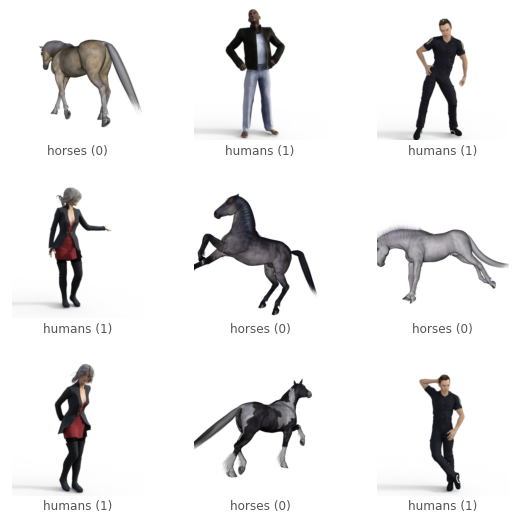

In [227]:
train, info_train = tfds.load(name='horses_or_humans', with_info=True, split='test')

tfds.show_examples(info_train, train);

In [220]:
info_train

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=1.0.0,
    description='A large set of images of horses and humans.',
    urls=['http://laurencemoroney.com/horses-or-humans-dataset'],
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [209]:
def scale(image,label):
    image = tf.cast(image, tf.float32)
    image /= 255.0
    
    return tf.image.resize(image, [224,224], tf.one_hot(label, 2))

In [210]:
def get_dataset(batch_size=32):
    train_dataset_scaled = datasets[0].map(scale).shuffle(1000).batch(batch_size)
    test_dataset_scaled = datasets[1].map(scale).batch(batch_size)
    return train_dataset_scaled, test_dataset_scaled

In [219]:
train_dataset_scaled = datasets[1].map(scale).shuffle(1000).batch(32)

TypeError: in user code:

    <ipython-input-209-1fba32db2074>:5 scale  *
        return tf.image.resize(image, [224,224], tf.one_hot(label, 2))
    /home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py:1517 resize_images_v2  **
        skip_resize_if_same=False)
    /home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py:1247 _resize_images_common
        images = resizer_fn(images, size)
    /home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py:1489 resize_fn
        if method == ResizeMethod.BILINEAR:
    /home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:1491 tensor_equals
        return gen_math_ops.equal(self, other, incompatible_shape_error=False)
    /home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py:3224 equal
        name=name)
    /home/mario/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:479 _apply_op_helper
        repr(values), type(values).__name__, err))

    TypeError: Expected float32 passed to parameter 'y' of op 'Equal', got 'bilinear' of type 'str' instead. Error: Expected float32, got 'bilinear' of type 'str' instead.


In [228]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [229]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(224,224,3))

In [230]:
feature_extractor_layer.trainable=False

In [231]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [232]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc'])